Comparação de Métodos Ensemble
o	Compare o desempenho de diferentes métodos ensemble (Bagging, Boosting, Random Forest) em um mesmo conjunto de dados. Visualize as curvas de aprendizado e faça uma análise comparativa.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

In [3]:
# 1. Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# 2. Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# 3. Treinar os modelos

# Modelo Bagging com estimador padrão (árvore de decisão)
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=42)

In [7]:
# Modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [8]:
# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# 4. Avaliar a acurácia de cada modelo
models = {'Bagging': bagging_model, 'Gradient Boosting': gb_model, 'Random Forest': rf_model}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Acurácia do modelo {name}: {accuracy * 100:.2f}%')

Acurácia do modelo Bagging: 100.00%
Acurácia do modelo Gradient Boosting: 100.00%
Acurácia do modelo Random Forest: 100.00%


In [10]:
# 5. Visualizar as curvas de aprendizado
def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label='Acurácia Treinamento')
    plt.plot(train_sizes, test_scores_mean, label='Acurácia Validação')
    plt.title(title)
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid()
    plt.show()

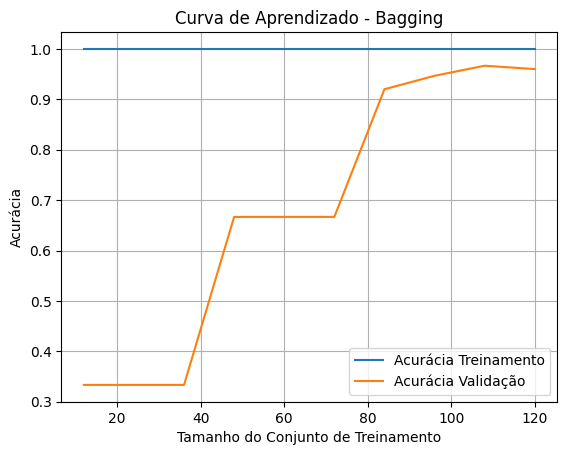

c:\Users\iago\Desktop\unipe\marchine larning\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\iago\Desktop\unipe\marchine larning\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\iago\Desktop\unipe\marchine larning\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\iago\Desktop\unipe\march

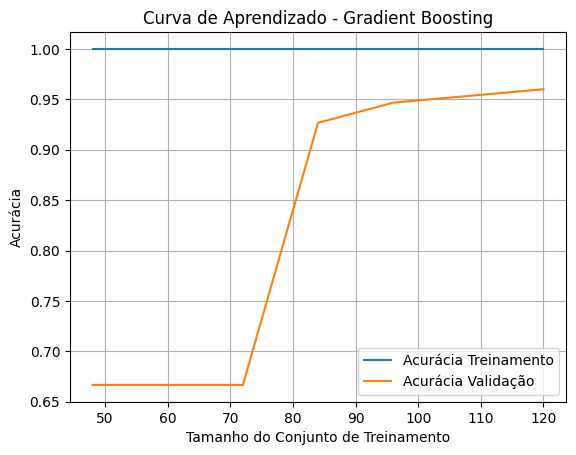

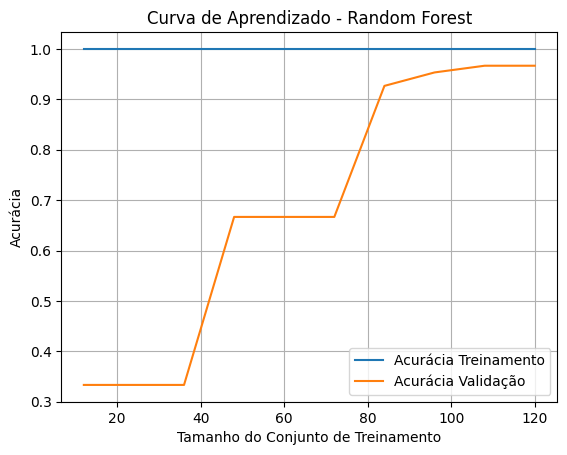

In [11]:
# Plotar as curvas de aprendizado para cada modelo
for name, model in models.items():
    plot_learning_curve(model, f'Curva de Aprendizado - {name}')